In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
from IPython.display import SVG
from IPython.display import display

In [5]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [6]:
iris_df = pd.read_csv('train_iris.csv')

In [7]:
test_iris_df = pd.read_csv('test_iris.csv')

In [10]:
iris_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [13]:
iris_df.isnull().sum() # there is no null values

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

## Cross validation

In [18]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [20]:
X_train = iris_df.drop(['Unnamed: 0', 'species'], axis=1)
y_train = iris_df.species

In [21]:
X_test = test_iris_df.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_iris_df.species

In [27]:
for max_depth in max_depth_values:
    np.random.seed(0)
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [29]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


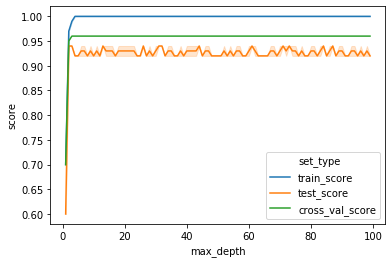

In [30]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [38]:
dogs_cats_df = pd.read_csv('dogs_n_cats.csv')

In [41]:
dogs_cats_df['Вид'] = (dogs_cats_df['Вид'] == 'собачка').astype(int)

In [42]:
dogs_cats_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [50]:
X_train = dogs_cats_df.drop(['Вид'], axis=1)
y_train = dogs_cats_df['Вид']

In [51]:
np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()

In [52]:
mean_cross_val_score

1.0

In [53]:
test_dogs_cats_df = pd.read_json('dataset_209691_15.txt')

In [55]:
y_pred = clf.predict(test_dogs_cats_df)

In [57]:
y_pred.sum()

53

## Metrics

In [58]:
15 / (15 + 15) # precision

0.5

In [59]:
15 / (15 + 30) # recall

0.3333333333333333

In [60]:
2 * 0.5 * 0.33 / (0.5 + 0.33) # f-measure

0.39759036144578314

In [70]:
songs_df = pd.read_csv('data/songs.csv')

In [71]:
songs_df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [72]:
X = songs_df.drop(['song', 'year', 'artist', 'lyrics', 'genre'], axis=1)
y = songs_df.artist

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
y_pred = clf.predict(X_test)

In [113]:
from sklearn.metrics import precision_score

In [114]:
precision = precision_score(y_test, y_pred, average='micro')

In [115]:
precision # test 0.78

0.6890756302521008

## Практика

In [4]:
df = pd.read_csv('data/train_data_tree.csv')

In [5]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [6]:
X_train = df.drop(['num'], axis=1)
y_train = df.num

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
help(tree._tree)

Help on module sklearn.tree._tree in sklearn.tree:

NAME
    sklearn.tree._tree

CLASSES
    builtins.object
        Tree
        TreeBuilder
            BestFirstTreeBuilder
            DepthFirstTreeBuilder
    
    class BestFirstTreeBuilder(TreeBuilder)
     |  Build a decision tree in best-first fashion.
     |  
     |  The best node to expand is given by the node at the frontier that has the
     |  highest impurity improvement.
     |  
     |  Method resolution order:
     |      BestFirstTreeBuilder
     |      TreeBuilder
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __reduce__ = __reduce_cython__(...)
     |  
     |  __setstate__ = __setstate_cython__(...)
     |  
     |  build(...)
     |      Build a decision tree from the training set (X, y).
     |  
     |  ----------------------------------------------------------------------
     |  Static methods defined here:
     |  
     |  __new__(*args, **kwargs) from builtins.type
     |

In [19]:
clf.tree_.impurity # entropy values

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [22]:
# 0 - индекс корня
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
l_n = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
l_e = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] # индекс корня левого поддерева
r_n = clf.tree_.n_node_samples[r_node] # сэмплов в левом поддереве
r_e = clf.tree_.impurity[r_node] # энтропия в корне левого поддерева

Information_Gain = impurity[0] - (l_n * l_e + r_n * r_e) / (l_n + r_n)

In [23]:
IG = clf.tree_.impurity[0] - (l_n * l_e + r_n * r_e) / (l_n + r_n)

In [24]:
IG

0.11939340343891591

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
dt = tree.DecisionTreeClassifier()

In [29]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
predicted = dt.predict(X_test)

In [31]:
from sklearn.model_selection import GridSearchCV #  RandomizedSearchCV more effective

dt = tree.DecisionTreeClassifier()
gs = GridSearchCV(dt, {'max_depth': range(1, 11), 
                       'min_samples_split': range(2, 11), 
                       'min_samples_leaf': range(1, 11)})

In [32]:
gs.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 11),
                       

In [33]:
best_tree = gs.best_estimator_

In [34]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
dt = DecisionTreeClassifier()
search = RandomizedSearchCV(dt, {'max_depth': range(1, 11), 
                       'min_samples_split': range(2, 11), 
                       'min_samples_leaf': range(1, 11)})
search.fit(X, y)
best_tree = search.best_estimator_

In [39]:
# conf_matrix = confusion_matrix(y, predictions)

## Contest

In [53]:
data = pd.read_csv('data/submissions_data_train.csv')

In [54]:
data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [55]:
data_ = data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [56]:
data_.head()

,user_id,last_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601


In [57]:
data = data.merge(data_, how='outer')

In [58]:
data.head()

,step_id,timestamp,submission_status,user_id,last_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163


In [65]:
data_ = data[data.timestamp == data.last_timestamp]

In [66]:
data_ = data_.groupby('step_id').agg({'user_id': 'count'})

In [67]:
data_.head()

,user_id
step_id,
31971,225
31972,215
31976,74
31977,293
31978,978
